# 버스 1

## 0.준비

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [ ]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

Mounted at /content/drive


In [ ]:
train = pd.read_csv('/content/drive/MyDrive/버스/train.csv')
test = pd.read_csv('/content/drive/MyDrive/버스/test.csv')
submission = pd.read_csv('/content/drive/MyDrive/버스/submission_제출양식.csv')

In [ ]:
train.head(3)

,id,date,route_id,vh_id,route_nm,now_latitude,now_longitude,now_station,now_arrive_time,distance,next_station,next_latitude,next_longitude,next_arrive_time
0,0,2019-10-15,405136001,7997025,360-1,33.456267,126.551750,제주대학교입구,06시,266.0,제대마을,33.457724,126.554014,24
1,1,2019-10-15,405136001,7997025,360-1,33.457724,126.554014,제대마을,06시,333.0,제대아파트,33.458783,126.557353,36
2,2,2019-10-15,405136001,7997025,360-1,33.458783,126.557353,제대아파트,06시,415.0,제주대학교,33.459893,126.561624,40


In [ ]:
test.head(3)

,id,date,route_id,vh_id,route_nm,now_latitude,now_longitude,now_station,now_arrive_time,distance,next_station,next_latitude,next_longitude
0,210457,2019-10-29,405136001,7997025,360-1,33.457724,126.554014,제대마을,07시,333.0,제대아파트,33.458783,126.557353
1,210458,2019-10-29,405136001,7997025,360-1,33.458783,126.557353,제대아파트,07시,415.0,제주대학교,33.459893,126.561624
2,210459,2019-10-29,405136001,7997025,360-1,33.478867,126.483833,한라중학교/부영아파트,08시,417.0,대림2차아파트,33.478850,126.488350


In [ ]:
submission.head(3)

,id,next_arrive_time
0,210457,0
1,210458,0
2,210459,0


## 1.데이터 살펴보기

In [ ]:
train

,id,date,route_id,vh_id,route_nm,now_latitude,now_longitude,now_station,now_arrive_time,distance,next_station,next_latitude,next_longitude,next_arrive_time
0,0,2019-10-15,405136001,7997025,360-1,33.456267,126.551750,제주대학교입구,06시,266.0,제대마을,33.457724,126.554014,24
1,1,2019-10-15,405136001,7997025,360-1,33.457724,126.554014,제대마을,06시,333.0,제대아파트,33.458783,126.557353,36
2,2,2019-10-15,405136001,7997025,360-1,33.458783,126.557353,제대아파트,06시,415.0,제주대학교,33.459893,126.561624,40
3,3,2019-10-15,405136001,7997025,360-1,33.479705,126.543811,남국원(아라방면),06시,578.0,제주여자중고등학교(아라방면),33.484860,126.542928,42
4,4,2019-10-15,405136001,7997025,360-1,33.485662,126.494923,도호동,07시,374.0,은남동,33.485822,126.490897,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210452,210452,2019-10-28,405328102,7983486,281-2,33.255783,126.577450,비석거리,21시,528.0,삼아아파트,33.251896,126.574417,96
210453,210453,2019-10-28,405328102,7983486,281-2,33.248595,126.568527,동문로터리,21시,280.0,매일올레시장 7번입구,33.249753,126.565959,50
210454,210454,2019-10-28,405328102,7983486,281-2,33.251891,126.560303,서귀포시 구 버스터미널,21시,114.0,아랑조을거리 입구,33.251084,126.559551,16
210455,210455,2019-10-28,405328102,7983486,281-2,33.251084,126.559551,아랑조을거리 입구,21시,223.0,평생학습관,33.249504,126.558068,38


In [ ]:
train[['next_latitude',	'next_longitude']][:5].values

array([[ 33.457724, 126.554014],
       [ 33.458783, 126.557353],
       [ 33.459893, 126.561624],
       [ 33.48486 , 126.542928],
       [ 33.485822, 126.490897]])

In [ ]:
center = [33.35, 126.5]

In [ ]:
import folium

locations = train[['next_latitude',	'next_longitude']][:5].values

m = folium.Map(location=center, zoom_start=11, tiles='cartodbpositron',)

for i, location in enumerate(locations):
  folium.Circle(
      radius=50,
      location=location,
      tooltip=train['next_station'].loc[i],
      fill=True
  ).add_to(m)

folium.PolyLine(locations=locations).add_to(m)

m

## 2.모델링

### 1) 데이터 전처리

In [ ]:
# id, date는 안겹치니까 필요 없음
# 범주형 데이터 숫자로 변경

train

,id,date,route_id,vh_id,route_nm,now_latitude,now_longitude,now_station,now_arrive_time,distance,next_station,next_latitude,next_longitude,next_arrive_time
0,0,2019-10-15,405136001,7997025,360-1,33.456267,126.551750,제주대학교입구,06시,266.0,제대마을,33.457724,126.554014,24
1,1,2019-10-15,405136001,7997025,360-1,33.457724,126.554014,제대마을,06시,333.0,제대아파트,33.458783,126.557353,36
2,2,2019-10-15,405136001,7997025,360-1,33.458783,126.557353,제대아파트,06시,415.0,제주대학교,33.459893,126.561624,40
3,3,2019-10-15,405136001,7997025,360-1,33.479705,126.543811,남국원(아라방면),06시,578.0,제주여자중고등학교(아라방면),33.484860,126.542928,42
4,4,2019-10-15,405136001,7997025,360-1,33.485662,126.494923,도호동,07시,374.0,은남동,33.485822,126.490897,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210452,210452,2019-10-28,405328102,7983486,281-2,33.255783,126.577450,비석거리,21시,528.0,삼아아파트,33.251896,126.574417,96
210453,210453,2019-10-28,405328102,7983486,281-2,33.248595,126.568527,동문로터리,21시,280.0,매일올레시장 7번입구,33.249753,126.565959,50
210454,210454,2019-10-28,405328102,7983486,281-2,33.251891,126.560303,서귀포시 구 버스터미널,21시,114.0,아랑조을거리 입구,33.251084,126.559551,16
210455,210455,2019-10-28,405328102,7983486,281-2,33.251084,126.559551,아랑조을거리 입구,21시,223.0,평생학습관,33.249504,126.558068,38


In [ ]:
set(test['now_station'].unique()) - set(train['now_station'].unique())

{'제주한라대학교(종점)'}

In [ ]:
train[train['now_station'] == '제주한라대학교(종점)']

,id,date,route_id,vh_id,route_nm,now_latitude,now_longitude,now_station,now_arrive_time,distance,next_station,next_latitude,next_longitude,next_arrive_time


In [ ]:
test[test['now_station'] == '제주한라대학교(종점)']

# train셋의 now_station과 next_station을 모두 합쳐서 dict로 만들어야 함

,id,date,route_id,vh_id,route_nm,now_latitude,now_longitude,now_station,now_arrive_time,distance,next_station,next_latitude,next_longitude
2868,213330,2019-10-29,405136521,7997001,365-21,33.477787,126.47574,제주한라대학교(종점),07시,431.0,시티주유소,33.476401,126.479759


In [ ]:
my_list = list(train['route_nm'].unique()) + list(train['now_station'].unique()) + list(train['next_station'].unique())
my_dict = {text : i for i, text in enumerate(my_list)}

In [ ]:
my_dict = {text : i for i, text in enumerate(my_list)}
my_dict

{'201-11': 6,
 '201-12': 7,
 '201-13': 8,
 '201-14': 9,
 '201-15': 10,
 '201-16': 11,
 '201-17': 12,
 '201-18': 13,
 '201-21': 14,
 '201-22': 15,
 '201-24': 16,
 '201-26': 17,
 '201-27': 18,
 '281-1': 19,
 '281-2': 20,
 '360-1': 0,
 '360-12': 3,
 '360-2': 1,
 '360-7': 2,
 '365-21': 4,
 '365-22': 5,
 '911의원': 472,
 'LH아파트': 602,
 '가마초등학교': 511,
 '가흥동': 509,
 '거로 입구': 552,
 '견월교': 709,
 '계룡동': 479,
 '고도농원': 713,
 '고래왓': 582,
 '고망난돌입구': 612,
 '고산동산(광양방면)': 409,
 '고산동산(아라방면)': 393,
 '고성리 구 성산농협': 495,
 '고성리 성산농협': 565,
 '고성리제주은행': 638,
 '고성오일시장': 681,
 '고으니모르 국립제주박물관': 457,
 '공업단지 입구': 705,
 '공천포': 524,
 '관덕정': 433,
 '광대왓': 534,
 '광양': 450,
 '광양사거리': 418,
 '광지동': 518,
 '광치기해변': 564,
 '교래입구': 696,
 '구 터미널': 530,
 '구좌보건지소': 678,
 '구좌중앙초등학교': 477,
 '국립제주박물관': 648,
 '그린카센터': 507,
 '금붕사': 640,
 '금산목': 590,
 '김녕리': 549,
 '김녕해수욕장': 588,
 '김녕환승정류장(김녕초등학교)': 548,
 '꽃동산': 710,
 '난산입구': 593,
 '난산입구(성산기상대)': 664,
 '남국사': 407,
 '남국원(광양방면)': 411,
 '남국원(아라방면)': 403,
 '남녕고등학교': 378,
 '남서광마을': 390,
 '남서광마을

In [ ]:
train[['route_nm', 'now_station', 'next_station']] = train[['route_nm', 'now_station', 'next_station']].applymap(lambda x:my_dict[x])

In [ ]:
train.head(3)

,id,date,route_id,vh_id,route_nm,now_latitude,now_longitude,now_station,now_arrive_time,distance,next_station,next_latitude,next_longitude,next_arrive_time
0,0,2019-10-15,405136001,7997025,0,33.456267,126.551750,400,06시,266.0,369,33.457724,126.554014,24
1,1,2019-10-15,405136001,7997025,0,33.457724,126.554014,369,06시,333.0,370,33.458783,126.557353,36
2,2,2019-10-15,405136001,7997025,0,33.458783,126.557353,370,06시,415.0,371,33.459893,126.561624,40


In [ ]:
my_dict['제주대학교입구']

400

In [ ]:
def text_to_time(text:str):
  return int(text[:2])

train['now_arrive_time'] = train['now_arrive_time'].map(text_to_time)
train

,id,date,route_id,vh_id,route_nm,now_latitude,now_longitude,now_station,now_arrive_time,distance,next_station,next_latitude,next_longitude,next_arrive_time
0,0,2019-10-15,405136001,7997025,0,33.456267,126.551750,400,6,266.0,369,33.457724,126.554014,24
1,1,2019-10-15,405136001,7997025,0,33.457724,126.554014,369,6,333.0,370,33.458783,126.557353,36
2,2,2019-10-15,405136001,7997025,0,33.458783,126.557353,370,6,415.0,371,33.459893,126.561624,40
3,3,2019-10-15,405136001,7997025,0,33.479705,126.543811,403,6,578.0,372,33.484860,126.542928,42
4,4,2019-10-15,405136001,7997025,0,33.485662,126.494923,382,7,374.0,373,33.485822,126.490897,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210452,210452,2019-10-28,405328102,7983486,20,33.255783,126.577450,580,21,528.0,634,33.251896,126.574417,96
210453,210453,2019-10-28,405328102,7983486,20,33.248595,126.568527,527,21,280.0,627,33.249753,126.565959,50
210454,210454,2019-10-28,405328102,7983486,20,33.251891,126.560303,633,21,114.0,531,33.251084,126.559551,16
210455,210455,2019-10-28,405328102,7983486,20,33.251084,126.559551,531,21,223.0,532,33.249504,126.558068,38


In [ ]:
def transform_df(df:pd.DataFrame):
  df[['route_nm', 'now_station', 'next_station']] = df[['route_nm', 'now_station', 'next_station']].applymap(lambda x:my_dict[x])

  def text_to_time(text:str):
    return int(text[:2])

  df['now_arrive_time'] = df['now_arrive_time'].map(text_to_time)
  
  return df

In [ ]:
test = transform_df(test)
test

,id,date,route_id,vh_id,route_nm,now_latitude,now_longitude,now_station,now_arrive_time,distance,next_station,next_latitude,next_longitude
0,210457,2019-10-29,405136001,7997025,0,33.457724,126.554014,369,7,333.0,370,33.458783,126.557353
1,210458,2019-10-29,405136001,7997025,0,33.458783,126.557353,370,7,415.0,371,33.459893,126.561624
2,210459,2019-10-29,405136001,7997025,0,33.478867,126.483833,408,8,417.0,374,33.478850,126.488350
3,210460,2019-10-29,405136001,7997025,0,33.478850,126.488350,374,8,334.0,375,33.480700,126.489933
4,210461,2019-10-29,405136001,7997025,0,33.480700,126.489933,375,8,550.0,401,33.482077,126.485355
...,...,...,...,...,...,...,...,...,...,...,...,...,...
91769,302350,2019-11-05,405328102,7983486,20,33.493625,126.534764,410,20,272.0,409,33.495540,126.532907
91770,302351,2019-11-05,405328102,7983486,20,33.495540,126.532907,409,20,447.0,414,33.498925,126.530351
91771,302352,2019-11-05,405328102,7983486,20,33.498925,126.530351,414,20,418.0,418,33.500473,126.527103
91772,302353,2019-11-05,405328102,7983486,20,33.500473,126.527103,418,20,140.0,391,33.500228,126.525625


### 2) 선형회귀

In [ ]:
train.columns

Index(['id', 'date', 'route_id', 'vh_id', 'route_nm', 'now_latitude',
       'now_longitude', 'now_station', 'now_arrive_time', 'distance',
       'next_station', 'next_latitude', 'next_longitude', 'next_arrive_time'],
      dtype='object')

In [ ]:
features = train.columns[2:-1]
target = train.columns[-1]

In [ ]:
from sklearn.linear_model import LinearRegression

X = train[features]
y = train[target]

model = LinearRegression()

model.fit(X,y)

y_pred = model.predict(test[features])

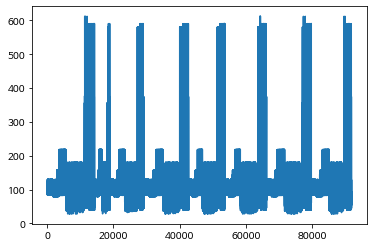

In [ ]:
plt.plot(y_pred)
plt.show()

In [ ]:
submission[target] = y_pred

In [ ]:
# public 50 private 50

submission.to_csv('submission.csv', index=False)

### 3) 랜덤포레스트

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

model.fit(X,y)

y_pred = model.predict(test[features])

In [ ]:
plt.plot(y_pred)
plt.show()

In [ ]:
submission[target] = y_pred

In [ ]:
# public 40 private 50

submission.to_csv('submission.csv', index=False)

## 3.모델 검증

### 1) validation셋 구축

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X,y, test_size=0.1, shuffle=False)

In [ ]:
X_train

,route_id,vh_id,route_nm,now_latitude,now_longitude,now_station,now_arrive_time,distance,next_station,next_latitude,next_longitude
0,405136001,7997025,0,33.456267,126.551750,400,6,266.0,369,33.457724,126.554014
1,405136001,7997025,0,33.457724,126.554014,369,6,333.0,370,33.458783,126.557353
2,405136001,7997025,0,33.458783,126.557353,370,6,415.0,371,33.459893,126.561624
3,405136001,7997025,0,33.479705,126.543811,403,6,578.0,372,33.484860,126.542928
4,405136001,7997025,0,33.485662,126.494923,382,7,374.0,373,33.485822,126.490897
...,...,...,...,...,...,...,...,...,...,...,...
189406,405320114,7983038,9,33.550601,126.782022,547,20,309.0,476,33.549650,126.778900
189407,405320114,7983038,9,33.549650,126.778900,476,20,1070.0,589,33.552287,126.768187
189408,405320114,7983038,9,33.552287,126.768187,589,20,834.0,588,33.555819,126.760293
189409,405320114,7983038,9,33.555819,126.760293,588,20,571.0,475,33.555767,126.754533


In [ ]:
X_valid

,route_id,vh_id,route_nm,now_latitude,now_longitude,now_station,now_arrive_time,distance,next_station,next_latitude,next_longitude
189411,405320114,7983038,9,33.555033,126.751250,548,20,400.0,549,33.554383,126.747113
189412,405320114,7983038,9,33.554383,126.747113,549,20,417.0,474,33.555433,126.742933
189413,405320114,7983038,9,33.551067,126.700217,559,20,588.0,558,33.548117,126.695033
189414,405320114,7983038,9,33.548117,126.695033,558,20,992.0,473,33.544183,126.685467
189415,405320114,7983038,9,33.539982,126.673231,657,20,407.0,470,33.541007,126.669136
...,...,...,...,...,...,...,...,...,...,...,...
210452,405328102,7983486,20,33.255783,126.577450,580,21,528.0,634,33.251896,126.574417
210453,405328102,7983486,20,33.248595,126.568527,527,21,280.0,627,33.249753,126.565959
210454,405328102,7983486,20,33.251891,126.560303,633,21,114.0,531,33.251084,126.559551
210455,405328102,7983486,20,33.251084,126.559551,531,21,223.0,532,33.249504,126.558068


### 2) 선형회귀 모델 검증

In [ ]:
from sklearn.metrics import mean_squared_error

def rmse(pred, real):
  return mean_squared_error(pred, real)**0.5

In [ ]:
model = LinearRegression()

model.fit(X_train,y_train)

y_pred = model.predict(X_valid)

lr_rmse = rmse(y_pred, y_valid)
lr_rmse

72.47020299658232

### 3) 랜덤포레스트 모델 검증

In [ ]:
model = RandomForestRegressor()

model.fit(X_train,y_train)

y_pred = model.predict(X_valid)

rf_rmse = rmse(y_pred, y_valid)
rf_rmse

57.06494583791064

In [ ]:
lr_rmse/rf_rmse

1.2699600767593704

In [ ]:
50/40

1.25

## 4.EDA - target

### 1) 버스 운행시간 그래프

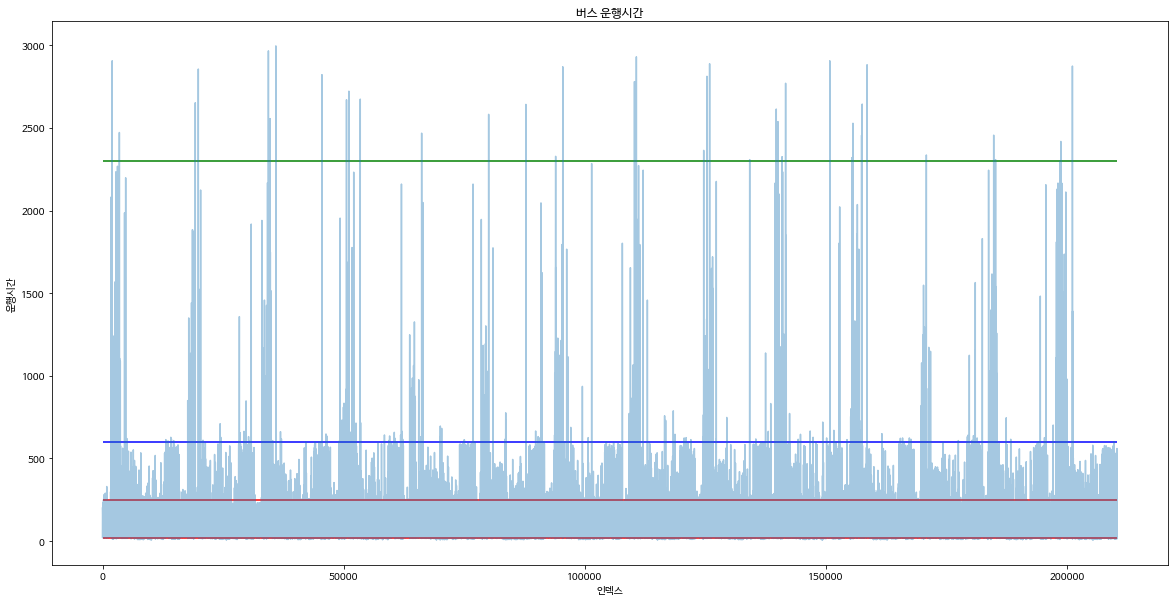

In [ ]:
train['next_arrive_time'].plot(figsize=(20,10), alpha=0.4)

plt.title('버스 운행시간')
plt.xlabel('인덱스')
plt.ylabel('운행시간')

plt.hlines(y = 20, xmin=0, xmax=len(train), colors='red')
plt.hlines(y = 250, xmin=0, xmax=len(train), colors='red')
plt.hlines(y = 600, xmin=0, xmax=len(train), colors='blue')
plt.hlines(y = 2300, xmin=0, xmax=len(train), colors='green')

plt.show()

### 2) 버스 운행시간 구간 별 횟수 그래프

In [ ]:
a = train[train['next_arrive_time']<20]
b = train[(train['next_arrive_time']>=20) & (train['next_arrive_time']<250)]
c = train[(train['next_arrive_time']>=250) & (train['next_arrive_time']<600)]
d = train[(train['next_arrive_time']>=600) & (train['next_arrive_time']<2300)]
e = train[(train['next_arrive_time']>=2300)]

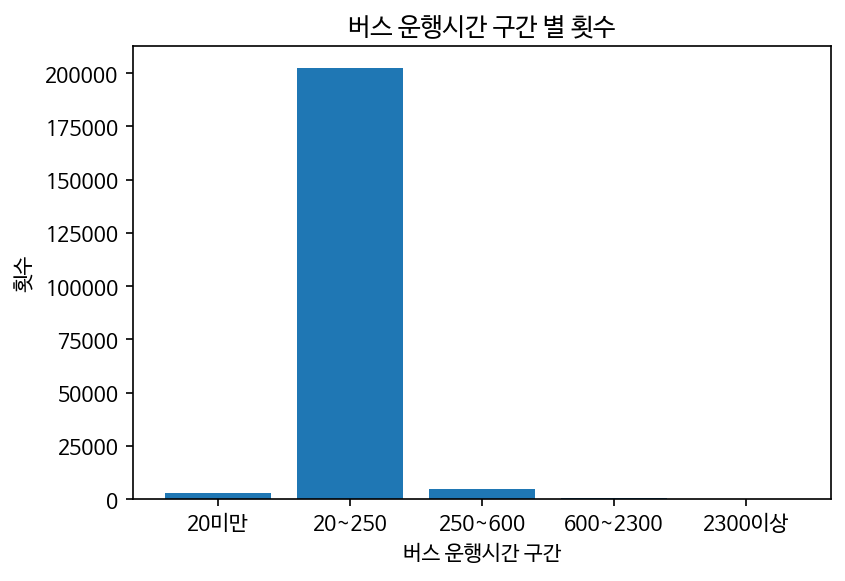

In [ ]:
x = ['20미만', '20~250', '250~600', '600~2300', '2300이상']
y = [len(a),len(b),len(c),len(d),len(e)]

plt.figure(dpi=150)

plt.title('버스 운행시간 구간 별 횟수')
plt.xlabel('버스 운행시간 구간')
plt.ylabel('횟수')

plt.bar(x,y)
plt.show()

### 3) 버스 운행시간 b구간이 차지하는 비율 그래프

In [ ]:
len(b)/len(train)

0.9625481689846382

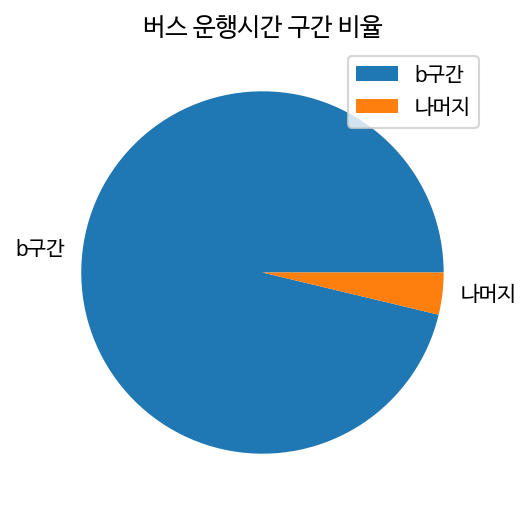

In [ ]:
x = ['b구간', '나머지']
y = [len(b)/len(train), (1-len(b)/len(train))]

plt.figure(dpi=150)

plt.title('버스 운행시간 구간 비율')

plt.pie(y, labels=x)
plt.legend()
plt.show()

### 4) 버스 운행시간 히스토그램

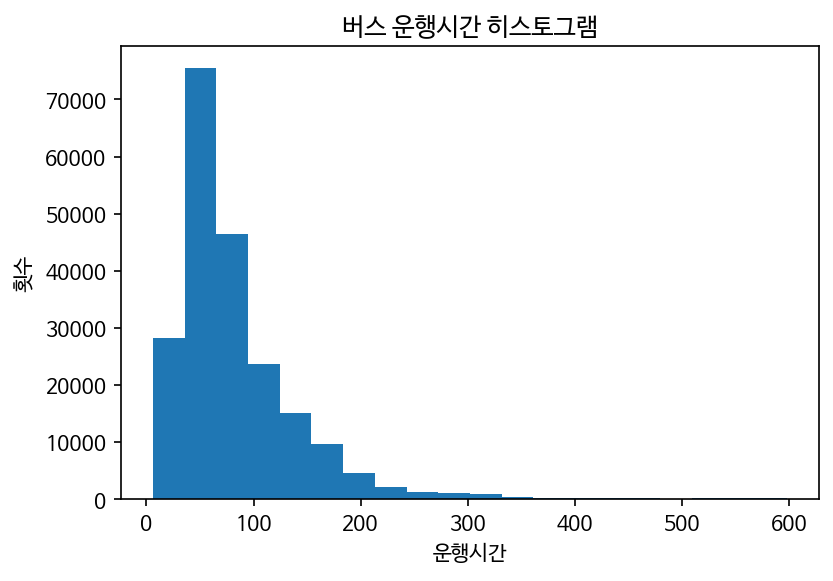

In [ ]:
plt.figure(dpi=150)

plt.title('버스 운행시간 히스토그램')
plt.xlabel('운행시간')
plt.ylabel('횟수')

plt.hist(train[train['next_arrive_time']<600]['next_arrive_time'], bins=20)
plt.show()

### 5) 버스 운행시간과 거리

In [ ]:
a['distance'].mean()

181.05179282868525

In [ ]:
pd.concat([b,c,d,e])['distance'].mean()

494.36649718819814

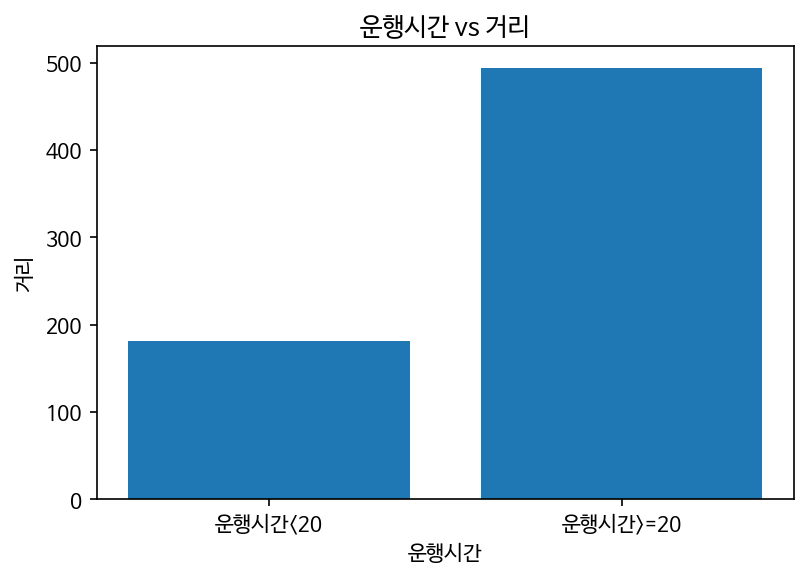

In [ ]:
x = ['운행시간<20', '운행시간>=20']
y = [a['distance'].mean(), pd.concat([b,c,d,e])['distance'].mean()]

plt.figure(dpi=150)

plt.title('운행시간 vs 거리')
plt.xlabel('운행시간')
plt.ylabel('거리')

plt.bar(x,y)
plt.show()

In [ ]:
b['distance'].mean()

449.89411329137357

In [ ]:
c['distance'].mean()

2336.6912866623848

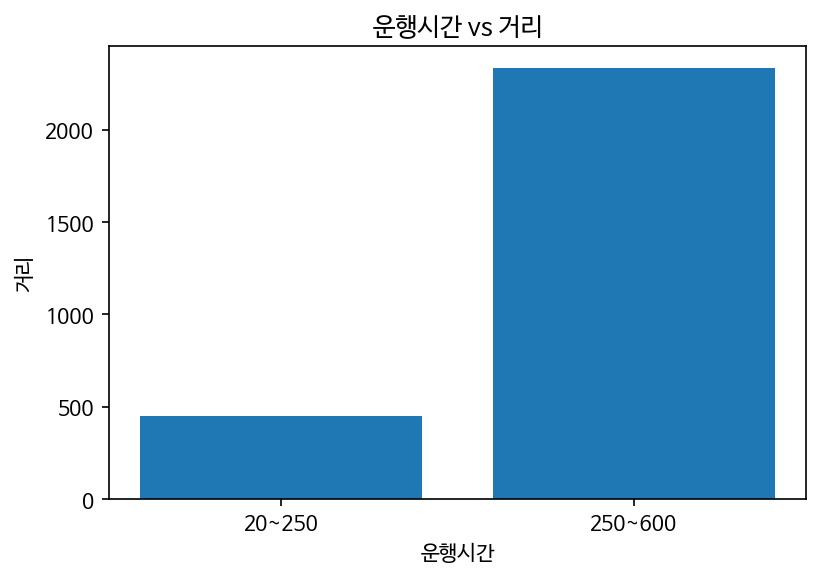

In [ ]:
x = ['20~250', '250~600']
y = [b['distance'].mean(), c['distance'].mean()]

plt.figure(dpi=150)

plt.title('운행시간 vs 거리')
plt.xlabel('운행시간')
plt.ylabel('거리')

plt.bar(x,y)
plt.show()

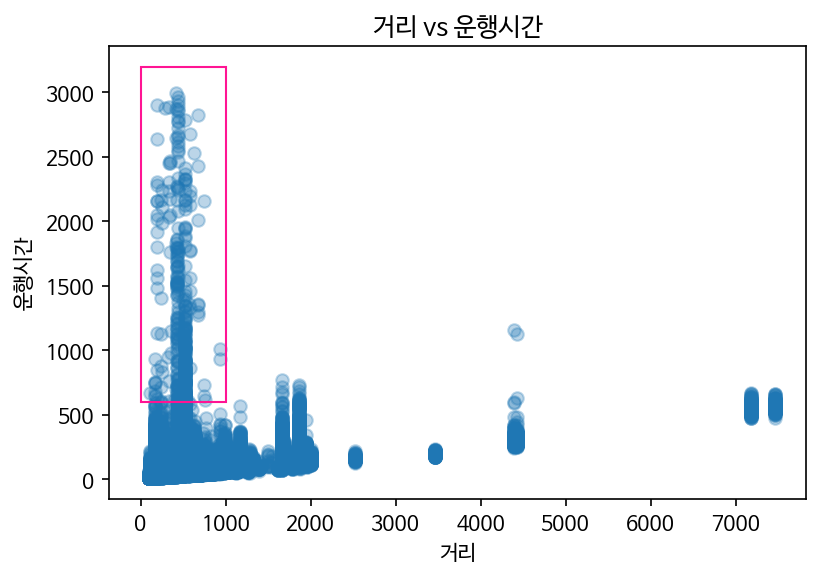

In [ ]:
import matplotlib.patches as patches

x = train['distance']
y = train['next_arrive_time']

plt.figure(dpi = 150)

plt.title('거리 vs 운행시간')
plt.xlabel('거리')
plt.ylabel('운행시간')

plt.scatter(x,y, alpha = 0.3)

plt.gca().add_patch(
   patches.Rectangle(
      (0, 600),
      1000, 2600,               
      edgecolor = 'deeppink',
      fill=False,
   ))

plt.show()

### 6) 거리는 짧은데 운행시간은 긴 데이터

In [ ]:
train[(train['distance'] < 1000) & (train['next_arrive_time'] > 600)]

,id,date,route_id,vh_id,route_nm,now_latitude,now_longitude,now_station,now_arrive_time,distance,next_station,next_latitude,next_longitude,next_arrive_time
1785,1785,2019-10-15,405136002,7997043,1,33.458900,126.557300,370,7,435.0,371,33.460114,126.561659,2082
1840,1840,2019-10-15,405136002,7997082,1,33.458900,126.557300,370,5,435.0,371,33.460114,126.561659,1372
1997,1997,2019-10-15,405136002,7997082,1,33.477560,126.477406,427,16,518.0,428,33.476260,126.481417,668
2003,2003,2019-10-15,405136002,7997082,1,33.458900,126.557300,370,17,435.0,371,33.460114,126.561659,2906
2113,2113,2019-10-15,405136002,7997111,1,33.477560,126.477406,427,12,518.0,428,33.476260,126.481417,862
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199675,199675,2019-10-28,405136521,7997089,4,33.476401,126.479759,442,19,431.0,443,33.477787,126.475740,1428
199818,199818,2019-10-28,405136522,7997002,5,33.502112,126.527961,450,16,253.0,449,33.504099,126.526639,2112
200069,200069,2019-10-28,405136522,7997032,5,33.476533,126.544283,396,6,355.0,403,33.479705,126.543811,980
201187,201187,2019-10-28,405136522,7997107,5,33.458783,126.557353,370,18,415.0,371,33.459893,126.561624,2874


- 도심 또는 제주대학교

In [ ]:
import folium

locations = train[(train['distance'] < 1000) & (train['next_arrive_time'] > 600)][['next_latitude',	'next_longitude']].values

m = folium.Map(location=center, zoom_start=11, tiles='cartodbpositron')

for location in locations:
  folium.Circle(
      radius=300,
      location=location,
      fill=True
  ).add_to(m)

m

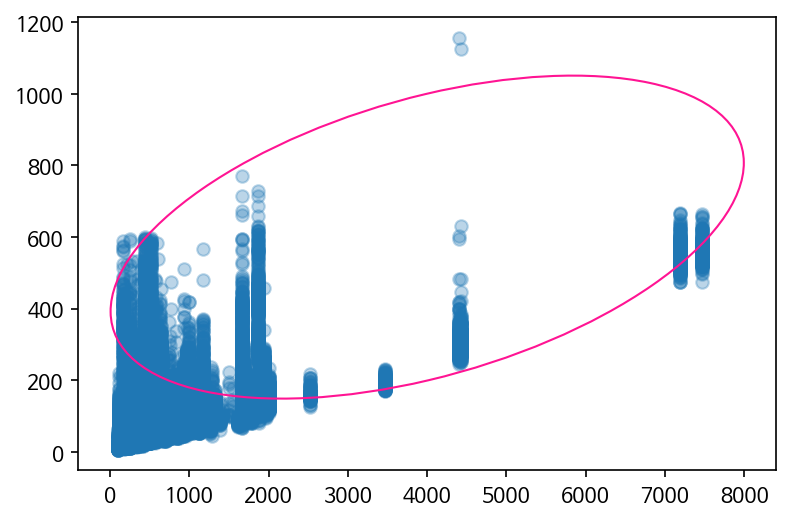

In [ ]:
temp = train[(train['distance'] >= 1000) | (train['next_arrive_time'] <= 600)]

x = temp['distance']
y = temp['next_arrive_time']

plt.figure(dpi = 150)
plt.scatter(x,y, alpha = 0.3)

plt.gca().add_patch(
   patches.Ellipse(
      (4000, 600),
      8000, 800,               
      edgecolor = 'deeppink',
      fill=False,
      angle=3
   ))

plt.show()

### 7) 극도로 오래 걸린 데이터

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/버스/train.csv')
test = pd.read_csv('/content/drive/MyDrive/버스/test.csv')
submission = pd.read_csv('/content/drive/MyDrive/버스/submission_제출양식.csv')

In [ ]:
train[train['next_arrive_time'] > 2300]

,id,date,route_id,vh_id,route_nm,now_latitude,now_longitude,now_station,now_arrive_time,distance,next_station,next_latitude,next_longitude,next_arrive_time
2003,2003,2019-10-15,405136002,7997082,360-2,33.458900,126.557300,제대아파트,17시,435.0,제주대학교,33.460114,126.561659,2906
3487,3487,2019-10-15,405136521,7997070,365-21,33.458900,126.557300,제대아파트,16시,435.0,제주대학교,33.460114,126.561659,2472
19236,19236,2019-10-16,405136521,7997001,365-21,33.458900,126.557300,제대아파트,18시,435.0,제주대학교,33.460114,126.561659,2652
19864,19864,2019-10-16,405136521,7997087,365-21,33.458900,126.557300,제대아파트,18시,435.0,제주대학교,33.460114,126.561659,2856
34404,34404,2019-10-17,405136012,7997041,360-12,33.460114,126.561659,제주대학교,19시,435.0,제대아파트,33.458900,126.557300,2966
34763,34763,2019-10-17,405136521,7997070,365-21,33.458900,126.557300,제대아파트,17시,435.0,제주대학교,33.460114,126.561659,2556
35950,35950,2019-10-17,405136522,7997056,365-22,33.459893,126.561624,제주대학교,18시,415.0,제대아파트,33.458783,126.557353,2996
45511,45511,2019-10-17,405328102,7983401,281-2,33.452636,126.551640,사회복지법인 춘강,18시,676.0,산천단 한국폴리텍대학,33.447993,126.555583,2822
45513,45513,2019-10-17,405328102,7983401,281-2,33.452636,126.551640,사회복지법인 춘강,19시,676.0,산천단 한국폴리텍대학,33.447993,126.555583,2428
50606,50606,2019-10-18,405136521,7997001,365-21,33.458900,126.557300,제대아파트,18시,435.0,제주대학교,33.460114,126.561659,2670


In [ ]:
locations = train[train['next_arrive_time'] > 2300][['next_latitude',	'next_longitude']].values

center = [((train[['now_latitude',	'now_longitude']].loc[1].values[0])+(train[['now_latitude',	'now_longitude']].loc[len(train)-1].values[0]))/2, 
          ((train[['now_latitude',	'now_longitude']].loc[1].values[1])+(train[['now_latitude',	'now_longitude']].loc[len(train)-1].values[1]))/2]

m = folium.Map(location=center, zoom_start=11)

for location in locations:
  folium.Circle(
      radius=300,
      location=location,
      fill=True
  ).add_to(m)

m

In [ ]:
train[(train['next_station'] == '제주대학교')]

,id,date,route_id,vh_id,route_nm,now_latitude,now_longitude,now_station,now_arrive_time,distance,next_station,next_latitude,next_longitude,next_arrive_time
2,2,2019-10-15,405136001,7997025,360-1,33.458783,126.557353,제대아파트,06시,415.0,제주대학교,33.459893,126.561624,40
35,35,2019-10-15,405136001,7997025,360-1,33.458783,126.557353,제대아파트,08시,415.0,제주대학교,33.459893,126.561624,80
103,103,2019-10-15,405136001,7997025,360-1,33.458783,126.557353,제대아파트,14시,415.0,제주대학교,33.459893,126.561624,68
141,141,2019-10-15,405136001,7997025,360-1,33.458783,126.557353,제대아파트,18시,415.0,제주대학교,33.459893,126.561624,72
180,180,2019-10-15,405136001,7997025,360-1,33.458783,126.557353,제대아파트,21시,415.0,제주대학교,33.459893,126.561624,52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201063,201063,2019-10-28,405136522,7997095,365-22,33.458783,126.557353,제대아파트,20시,415.0,제주대학교,33.459893,126.561624,58
201149,201149,2019-10-28,405136522,7997107,365-22,33.458783,126.557353,제대아파트,14시,415.0,제주대학교,33.459893,126.561624,44
201187,201187,2019-10-28,405136522,7997107,365-22,33.458783,126.557353,제대아파트,18시,415.0,제주대학교,33.459893,126.561624,2874
201317,201317,2019-10-28,405136522,7997110,365-22,33.458783,126.557353,제대아파트,15시,415.0,제주대학교,33.459893,126.561624,38


- 오래 걸린 친구들은 제주대학교 역이긴 하지만, 좌표가 좀 다름

In [ ]:
train[(train['next_station'] == '제주대학교') & (train['next_arrive_time'] > 300)]

,id,date,route_id,vh_id,route_nm,now_latitude,now_longitude,now_station,now_arrive_time,distance,next_station,next_latitude,next_longitude,next_arrive_time
1785,1785,2019-10-15,405136002,7997043,360-2,33.458900,126.557300,제대아파트,07시,435.0,제주대학교,33.460114,126.561659,2082
1840,1840,2019-10-15,405136002,7997082,360-2,33.458900,126.557300,제대아파트,05시,435.0,제주대학교,33.460114,126.561659,1372
2003,2003,2019-10-15,405136002,7997082,360-2,33.458900,126.557300,제대아파트,17시,435.0,제주대학교,33.460114,126.561659,2906
2569,2569,2019-10-15,405136012,7997028,360-12,33.458900,126.557300,제대아파트,06시,435.0,제주대학교,33.460114,126.561659,1568
3487,3487,2019-10-15,405136521,7997070,365-21,33.458900,126.557300,제대아파트,16시,435.0,제주대학교,33.460114,126.561659,2472
18456,18456,2019-10-16,405136012,7997028,360-12,33.458900,126.557300,제대아파트,06시,435.0,제주대학교,33.460114,126.561659,1442
18675,18675,2019-10-16,405136012,7997033,360-12,33.458900,126.557300,제대아파트,06시,435.0,제주대학교,33.460114,126.561659,1082
19236,19236,2019-10-16,405136521,7997001,365-21,33.458900,126.557300,제대아파트,18시,435.0,제주대학교,33.460114,126.561659,2652
19864,19864,2019-10-16,405136521,7997087,365-21,33.458900,126.557300,제대아파트,18시,435.0,제주대학교,33.460114,126.561659,2856
34460,34460,2019-10-17,405136521,7997001,365-21,33.458900,126.557300,제대아파트,07시,435.0,제주대학교,33.460114,126.561659,1796


In [ ]:
train[(train['next_station'] == '제주대학교')][['next_latitude',	'next_longitude']]

,next_latitude,next_longitude
2,33.459893,126.561624
35,33.459893,126.561624
103,33.459893,126.561624
141,33.459893,126.561624
180,33.459893,126.561624
...,...,...
201063,33.459893,126.561624
201149,33.459893,126.561624
201187,33.459893,126.561624
201317,33.459893,126.561624


In [ ]:
train[(train['next_station'] == '제주대학교') & (train['next_arrive_time'] > 300)][['next_latitude',	'next_longitude']].iloc[0].values

array([ 33.460114, 126.561659])

- 제주대학교 역 좌표 지도에 찍기

In [ ]:
locations = [train[(train['next_station'] == '제주대학교')][['next_latitude',	'next_longitude']].iloc[0].values, train[(train['next_station'] == '제주대학교') & (train['next_arrive_time'] > 300)][['next_latitude',	'next_longitude']].iloc[0].values]

center = [((train[['now_latitude',	'now_longitude']].loc[1].values[0])+(train[['now_latitude',	'now_longitude']].loc[len(train)-1].values[0]))/2, 
          ((train[['now_latitude',	'now_longitude']].loc[1].values[1])+(train[['now_latitude',	'now_longitude']].loc[len(train)-1].values[1]))/2]

m = folium.Map(location=center, zoom_start=11, tiles='cartodbpositron')

for i, location in enumerate(locations):
  folium.Circle(
      radius=10,
      location=location,
      tooltip=i,
      fill=True
  ).add_to(m)

m

- 좌표로도 오래 걸리는 데이터는 예측이 불가능

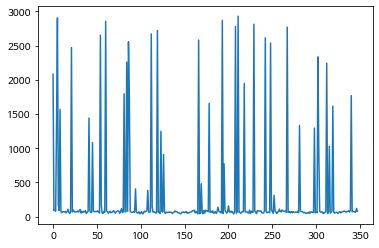

In [ ]:
train[train['next_longitude'] == 126.561659]['next_arrive_time'].reset_index(drop=True).plot()

## 5.이상치 예측 가능 여부 판단

In [ ]:
model = RandomForestRegressor()

model.fit(X_train, y_train)

y_pred = model.predict(X_valid)

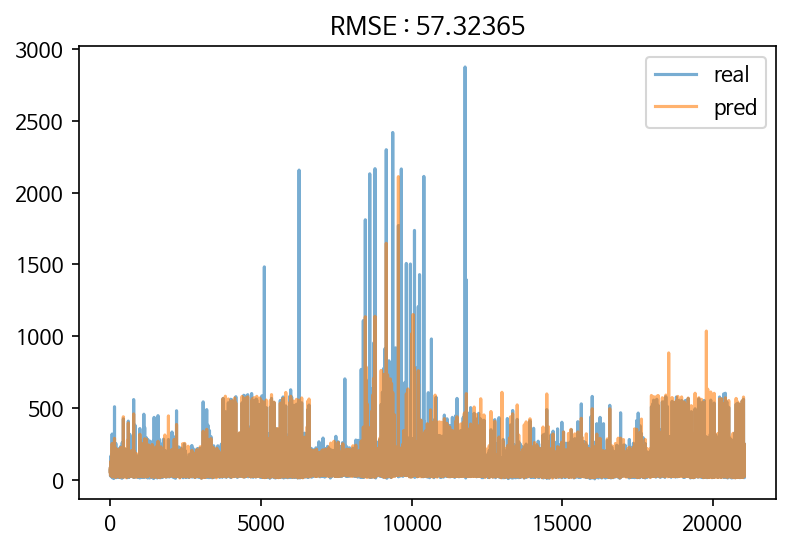

In [ ]:
RMSE = rmse(y_pred, y_valid)

plt.figure(dpi=150)

plt.title('RMSE : ' + str(RMSE)[:8])

plt.plot(y_valid.reset_index(drop=True), alpha=0.6, label='real')
plt.plot(y_pred, alpha=0.6, label='pred')

plt.legend()
plt.show()

In [ ]:
train = transform_df(train)
test = transform_df(test)

In [ ]:
train = train[train[target] <= 1000]

In [ ]:
X = train[features]
y = train[target]

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X,y, test_size=0.1, shuffle=False)

In [ ]:
model = RandomForestRegressor()

model.fit(X_train, y_train)

y_pred = model.predict(X_valid)

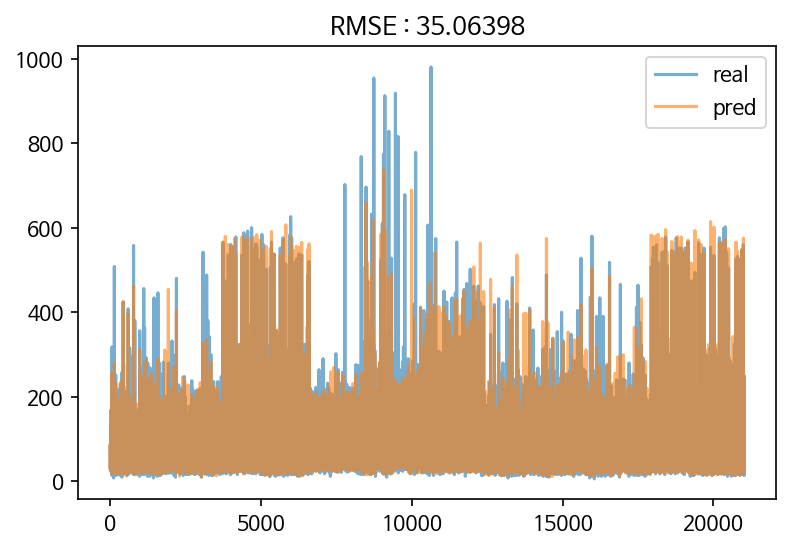

In [ ]:
RMSE = rmse(y_pred, y_valid)

plt.figure(dpi=150)

plt.title('RMSE : ' + str(RMSE)[:8])

plt.plot(y_valid.reset_index(drop=True), alpha=0.6, label='real')
plt.plot(y_pred, alpha=0.6, label='pred')

plt.legend()
plt.show()

## 6.이상치 제거 모델로 제출

In [ ]:
X = train[features]
y = train[target]

In [ ]:
model = RandomForestRegressor()

model.fit(X, y)

y_pred = model.predict(test[features])

In [ ]:
submission[target] = y_pred
submission.to_csv('submission.csv', index=False)